#Step 1: Import the Dataset and Perform EDA
1.1 Load the dataset and check its structure

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'bike_sharing.csv'
yulu_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(yulu_data.head())

# Display summary statistics
print(yulu_data.describe())

# Display info about the dataset
print(yulu_data.info())


              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427  

1.2 Check for missing values

In [ ]:
# Check for missing values
print(yulu_data.isnull().sum())


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


1.3 Univariate Analysis

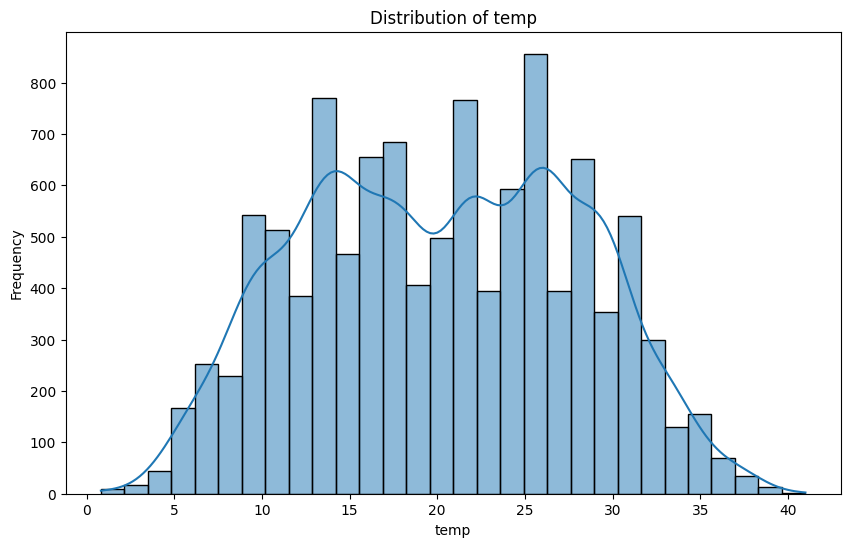

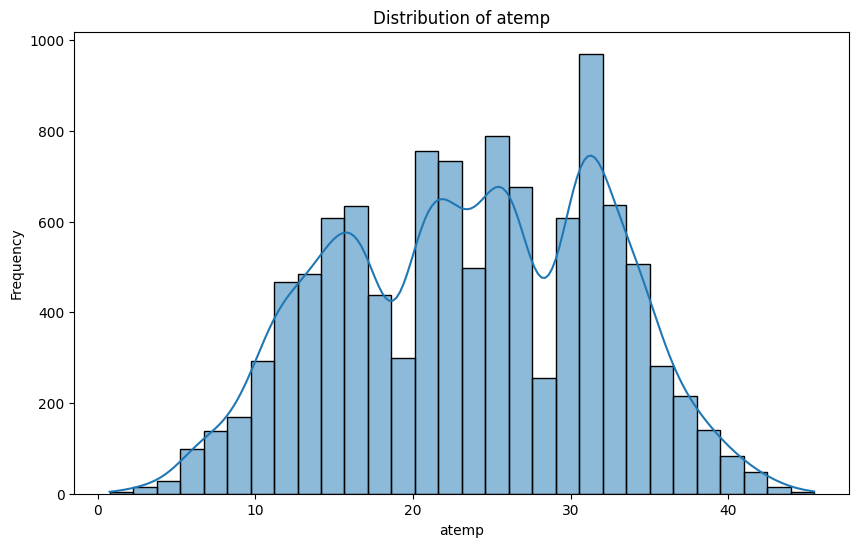

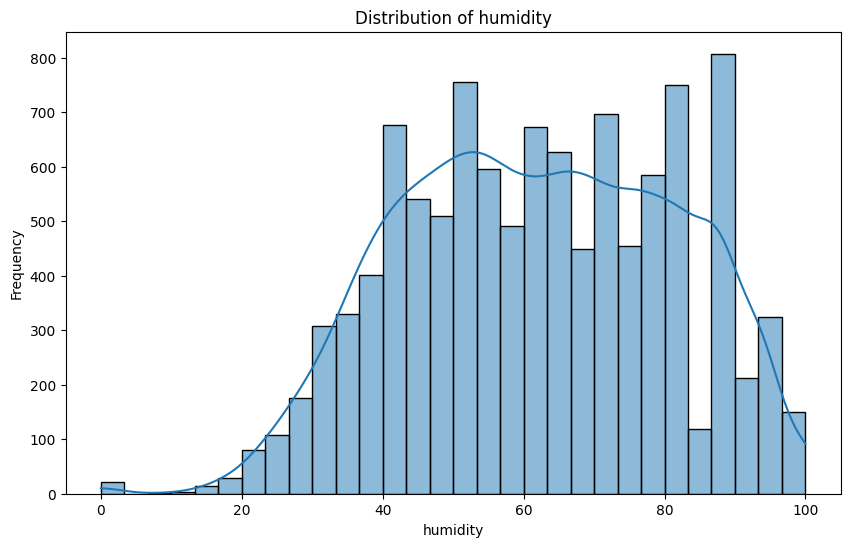

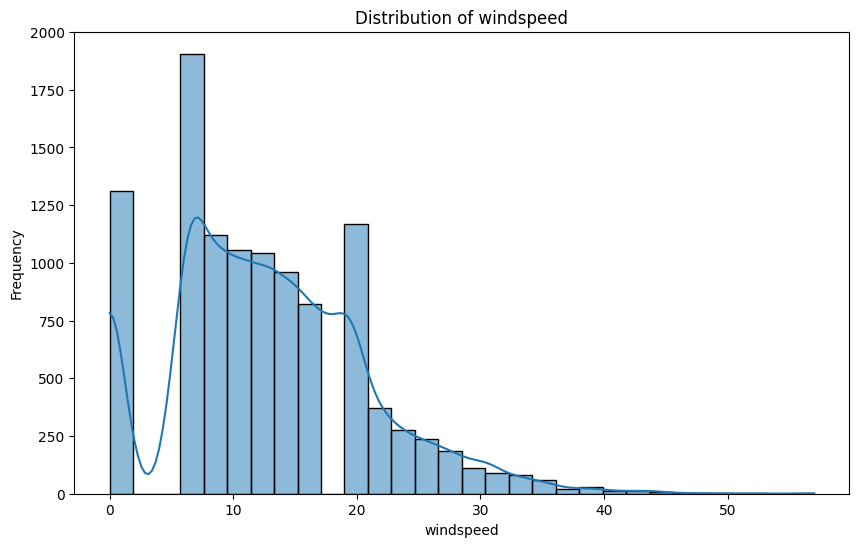

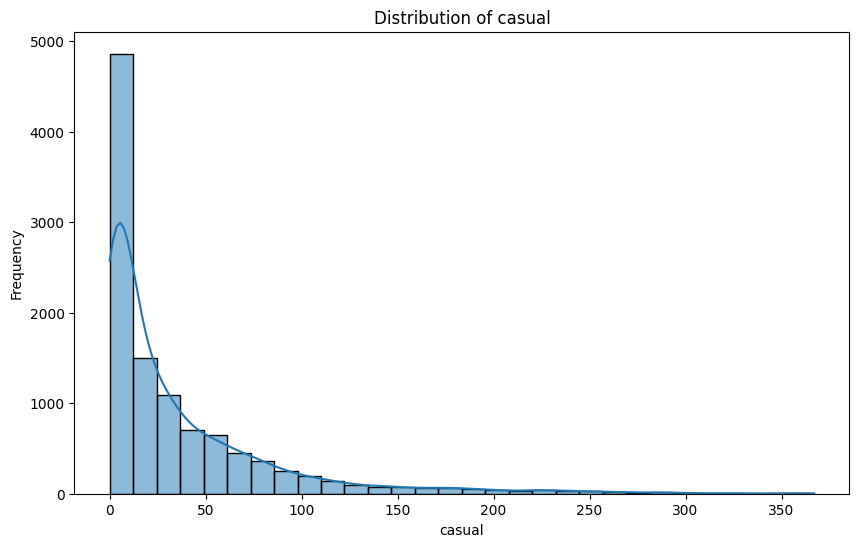

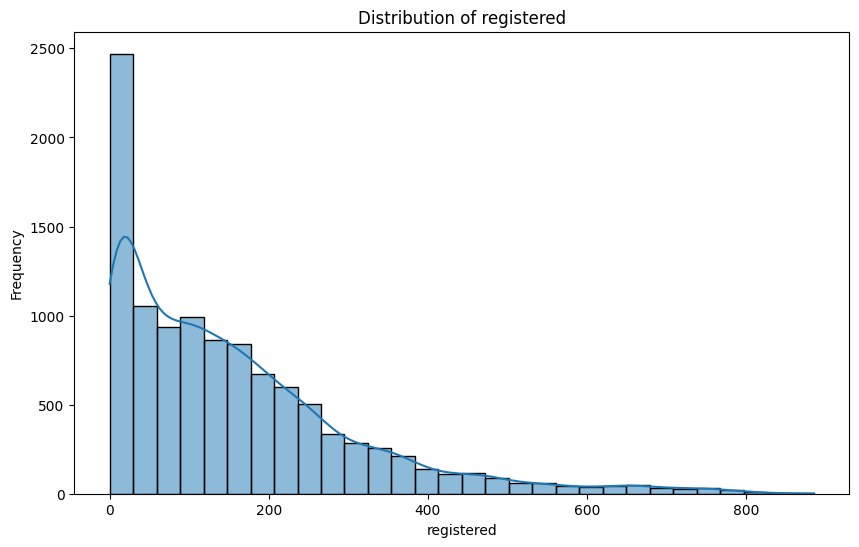

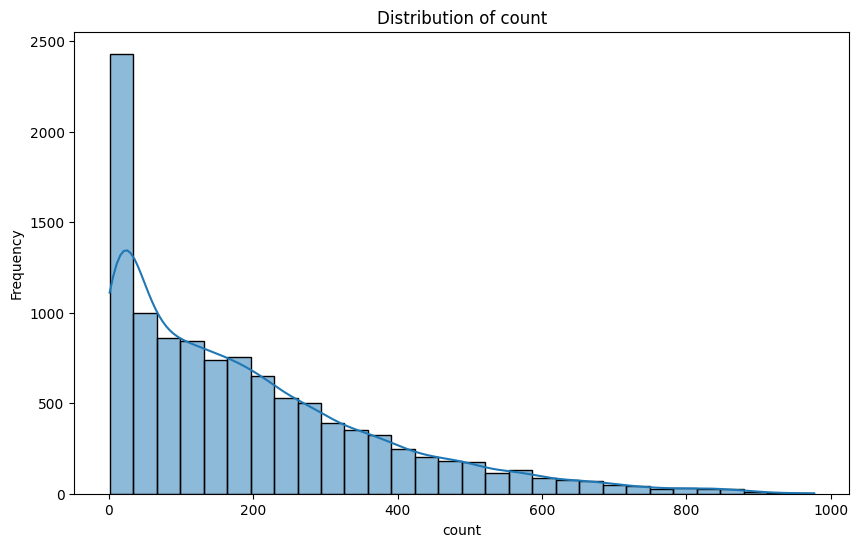

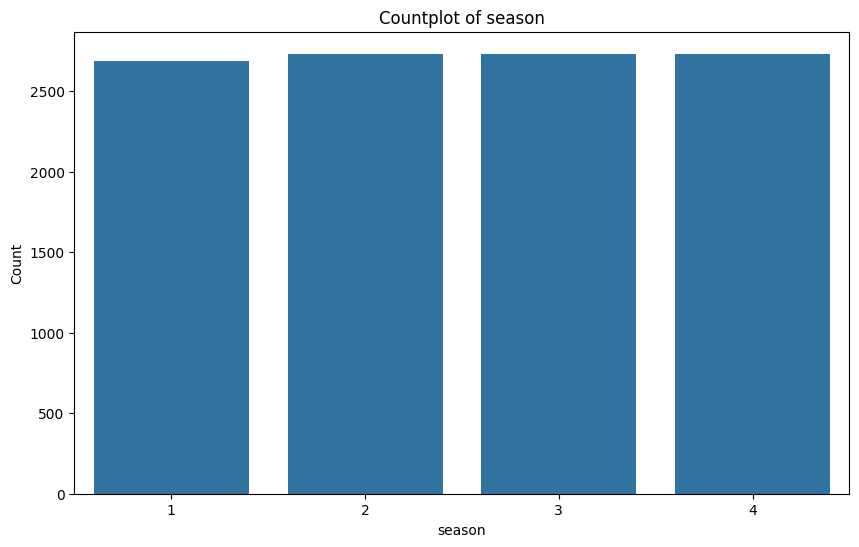

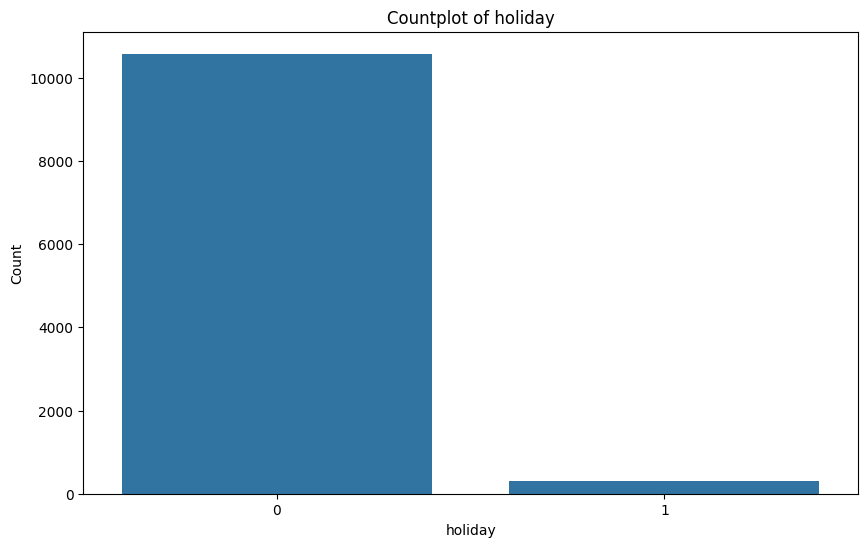

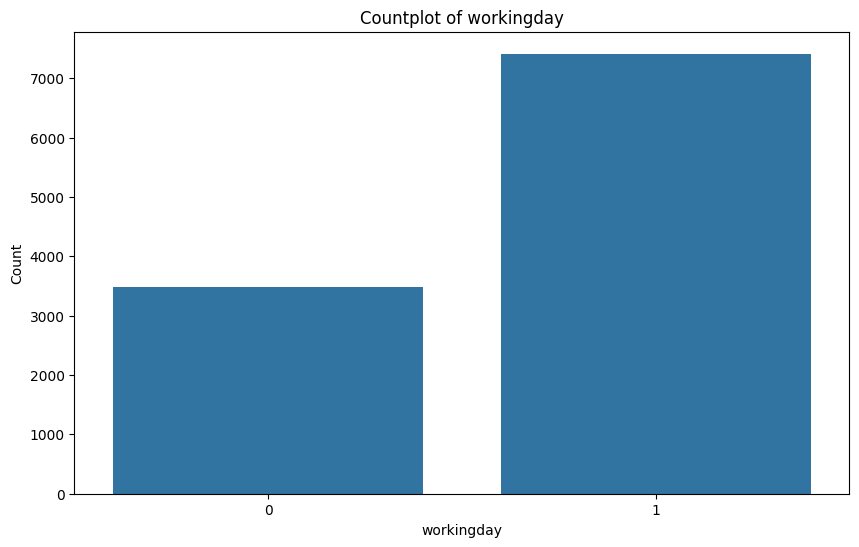

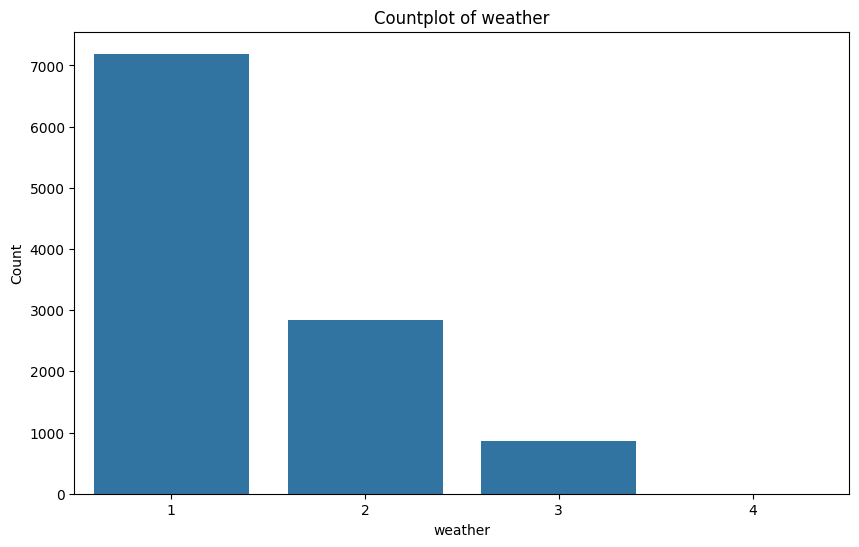

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of continuous variables
continuous_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(yulu_data[var], bins=30, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# Plot bar plots for categorical variables
categorical_vars = ['season', 'holiday', 'workingday', 'weather']
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=yulu_data, x=var)
    plt.title(f'Countplot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()


1.4 Bivariate Analysis

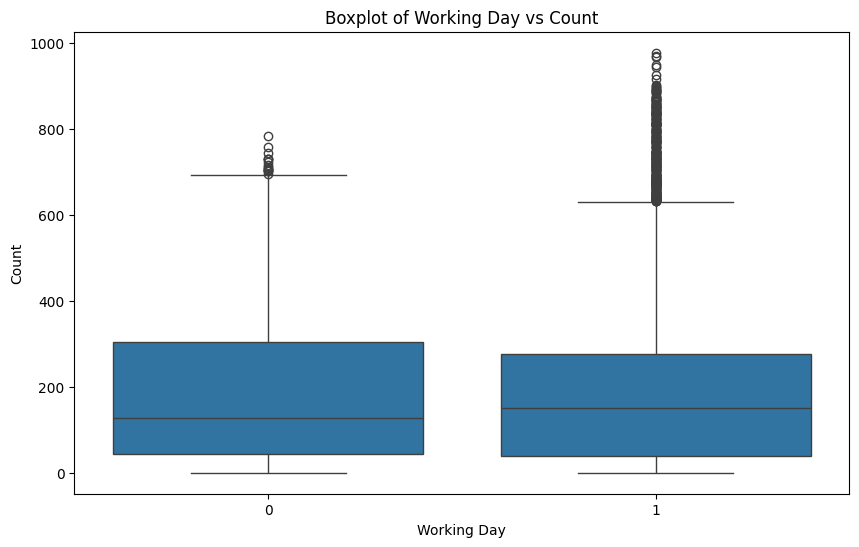

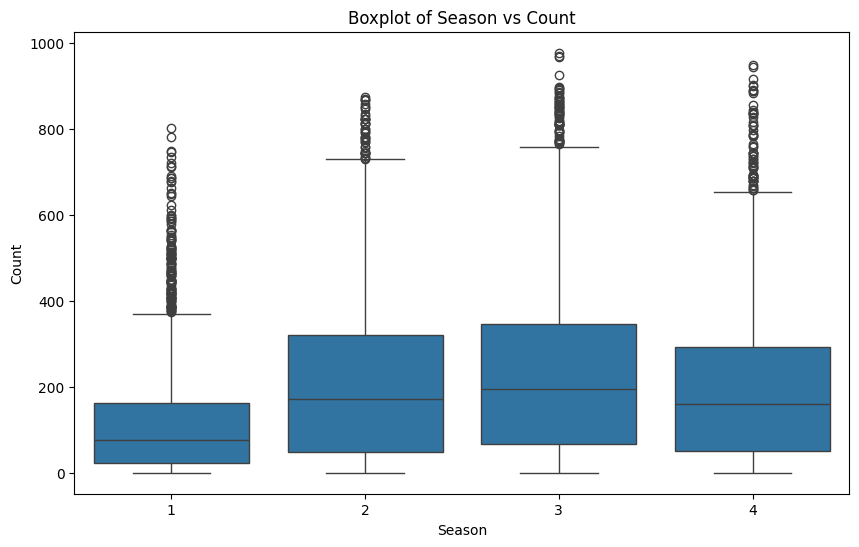

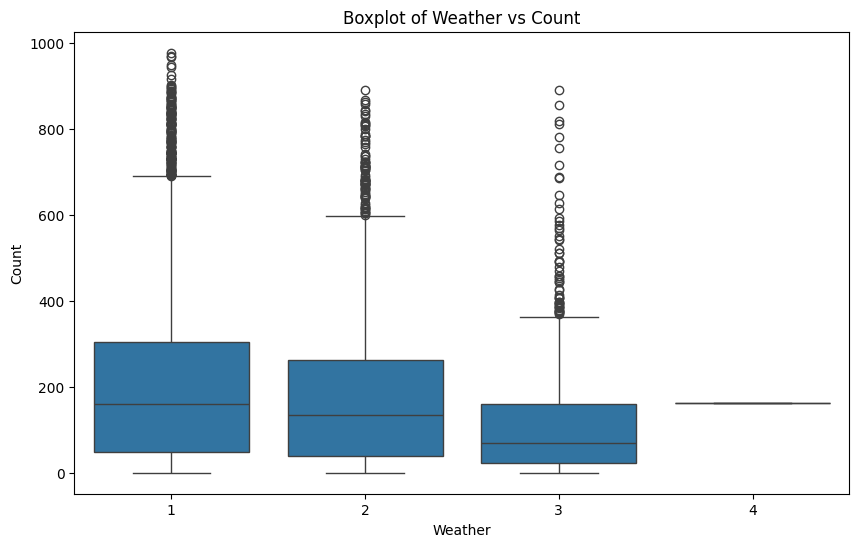

In [ ]:
# Relationship between workingday and count
plt.figure(figsize=(10, 6))
sns.boxplot(data=yulu_data, x='workingday', y='count')
plt.title('Boxplot of Working Day vs Count')
plt.xlabel('Working Day')
plt.ylabel('Count')
plt.show()

# Relationship between season and count
plt.figure(figsize=(10, 6))
sns.boxplot(data=yulu_data, x='season', y='count')
plt.title('Boxplot of Season vs Count')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

# Relationship between weather and count
plt.figure(figsize=(10, 6))
sns.boxplot(data=yulu_data, x='weather', y='count')
plt.title('Boxplot of Weather vs Count')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()


#Step 2: Hypothesis Testing

2.1 Effect of Working Day on Number of Electric Cycles Rented
Null Hypothesis (H₀): Working day has no effect on the number of electric cycles rented.
Alternative Hypothesis (H₁): Working day has an effect on the number of electric cycles rented.

In [ ]:
from scipy.stats import ttest_ind

# Separate data into working days and non-working days
workingday_data = yulu_data[yulu_data['workingday'] == 1]['count']
non_workingday_data = yulu_data[yulu_data['workingday'] == 0]['count']

# T-test
t_stat, p_value = ttest_ind(workingday_data, non_workingday_data)
print(f'T-test results: t-statistic = {t_stat}, p-value = {p_value}')


T-test results: t-statistic = 1.2096277376026694, p-value = 0.22644804226361348


2.2 Differences in Number of Cycles Rented Across Different Seasons
Null Hypothesis (H₀): The number of cycles rented is similar across different seasons.
Alternative Hypothesis (H₁): The number of cycles rented is different across different seasons.

In [ ]:
from scipy.stats import f_oneway

# ANOVA for seasons
season_groups = [yulu_data[yulu_data['season'] == season]['count'] for season in yulu_data['season'].unique()]
f_stat_season, p_value_season = f_oneway(*season_groups)
print(f'ANOVA results for seasons: F-statistic = {f_stat_season}, p-value = {p_value_season}')


ANOVA results for seasons: F-statistic = 236.94671081032106, p-value = 6.164843386499654e-149


2.3 Differences in Number of Cycles Rented Across Different Weather Conditions
Null Hypothesis (H₀): The number of cycles rented is similar across different weather conditions.
Alternative Hypothesis (H₁): The number of cycles rented is different across different weather conditions.

In [ ]:
# ANOVA for weather
weather_groups = [yulu_data[yulu_data['weather'] == weather]['count'] for weather in yulu_data['weather'].unique()]
f_stat_weather, p_value_weather = f_oneway(*weather_groups)
print(f'ANOVA results for weather: F-statistic = {f_stat_weather}, p-value = {p_value_weather}')


ANOVA results for weather: F-statistic = 65.53024112793271, p-value = 5.482069475935669e-42


2.4 Dependence of Weather on the Season
Null Hypothesis (H₀): Weather is independent of the season.
Alternative Hypothesis (H₁): Weather is dependent on the season.

In [ ]:
from scipy.stats import chi2_contingency

# Chi-square test
weather_season_table = pd.crosstab(yulu_data['weather'], yulu_data['season'])
chi2_stat, p_value_chi2, dof, expected = chi2_contingency(weather_season_table)
print(f'Chi-square test results: chi2-statistic = {chi2_stat}, p-value = {p_value_chi2}')


Chi-square test results: chi2-statistic = 49.15865559689363, p-value = 1.5499250736864862e-07


#Step 3: Conclusion and Interpretation

Interpret the p-values obtained from each hypothesis test and draw conclusions. For example:

If the p-value < 0.05 for the t-test, reject the null hypothesis and conclude that working days significantly affect the number of electric cycles rented.
If the p-value < 0.05 for ANOVA tests, reject the null hypothesis and conclude that there are significant differences in the number of cycles rented across different seasons and weather conditions.
If the p-value < 0.05 for the Chi-square test, reject the null hypothesis and conclude that weather is dependent on the season.

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


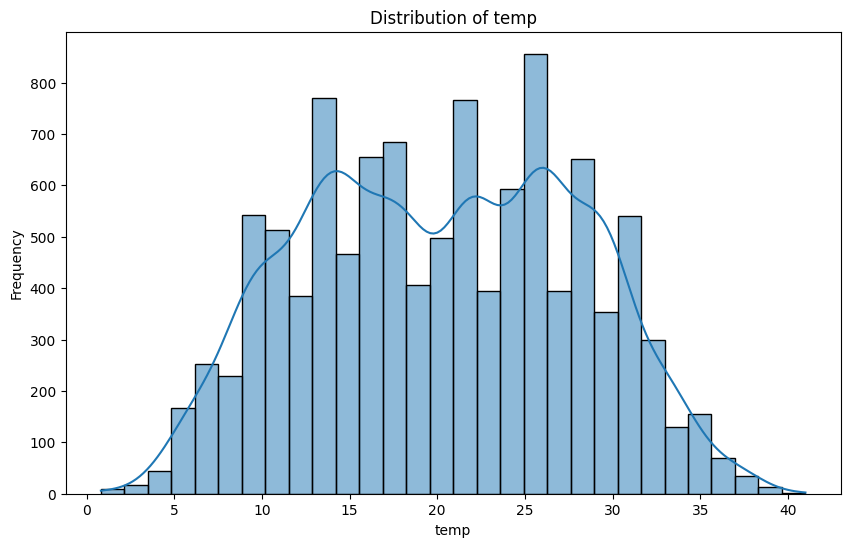

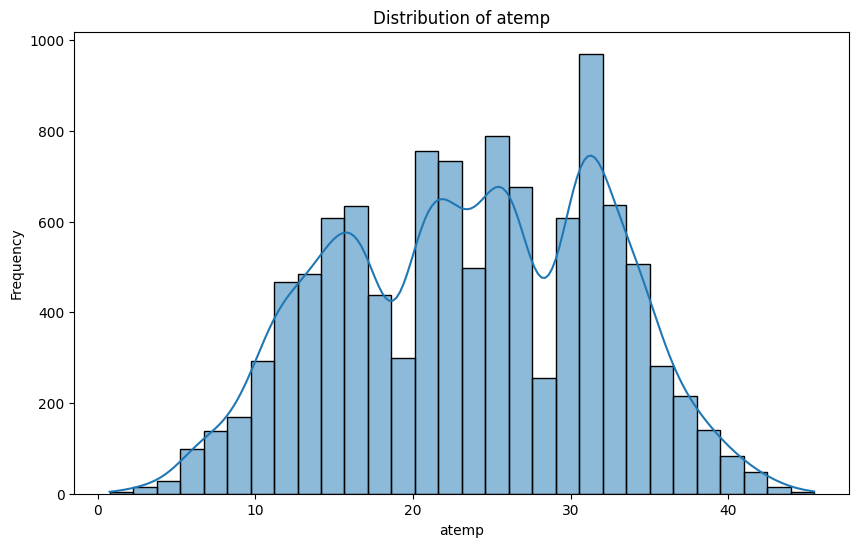

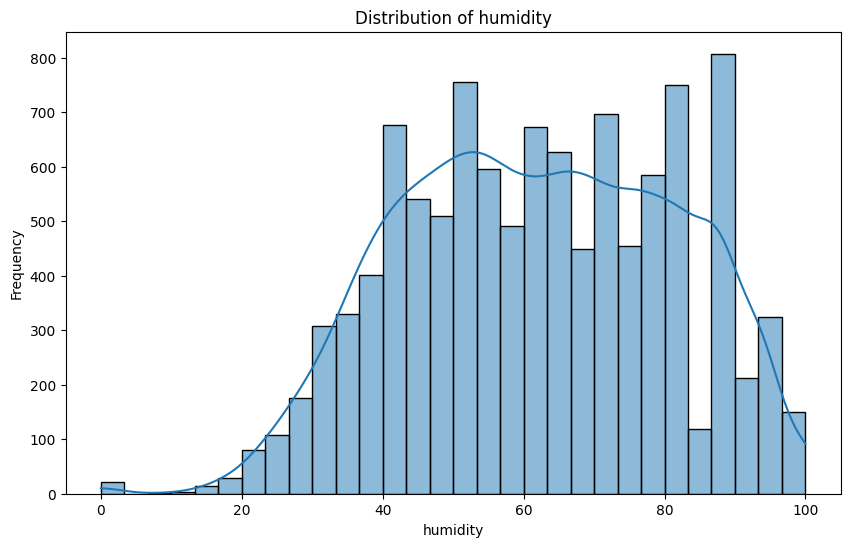

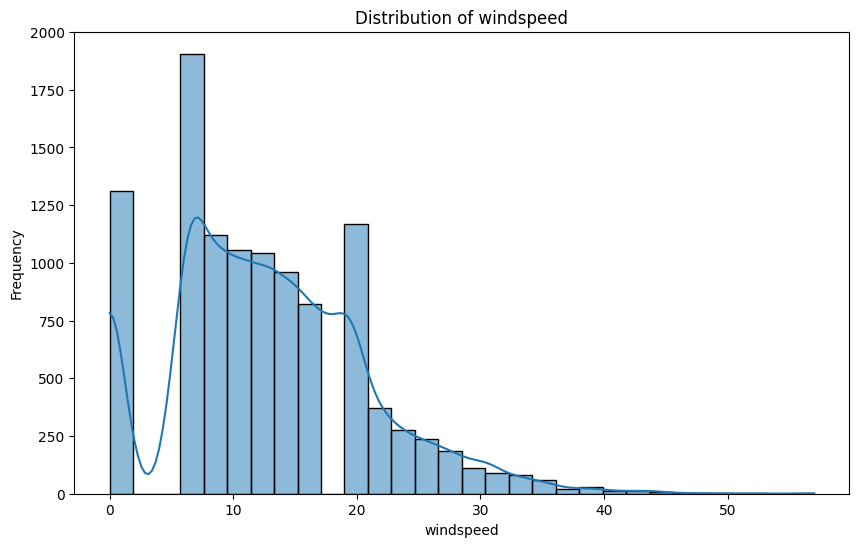

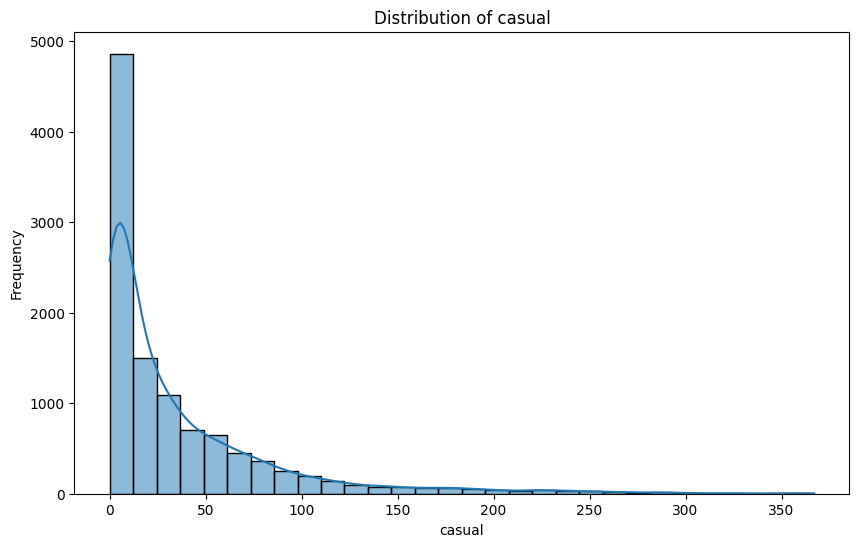

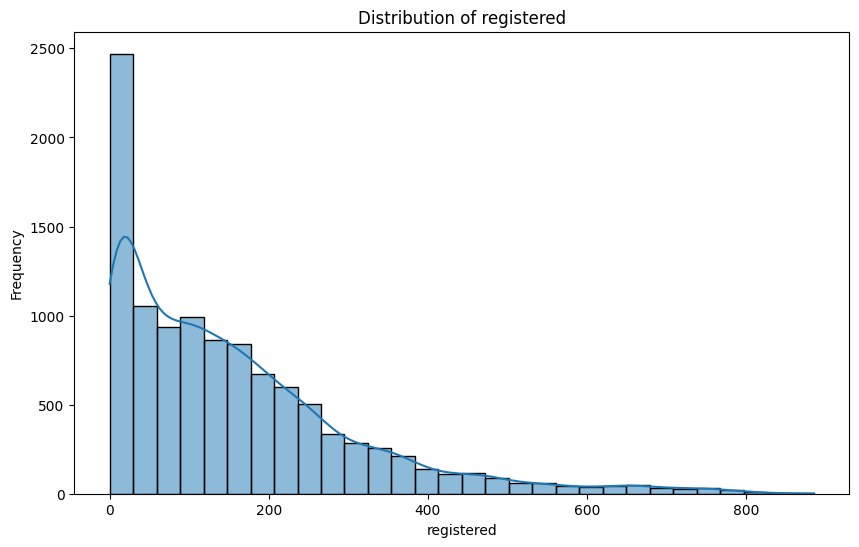

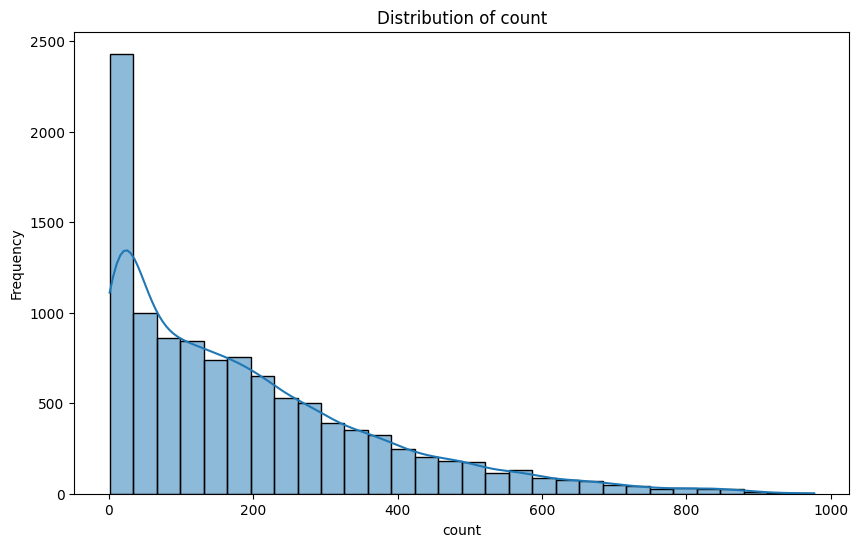

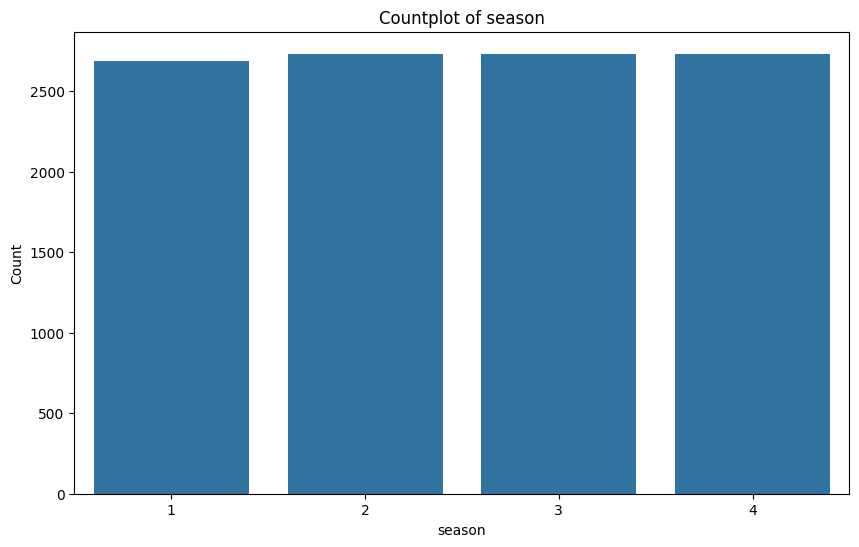

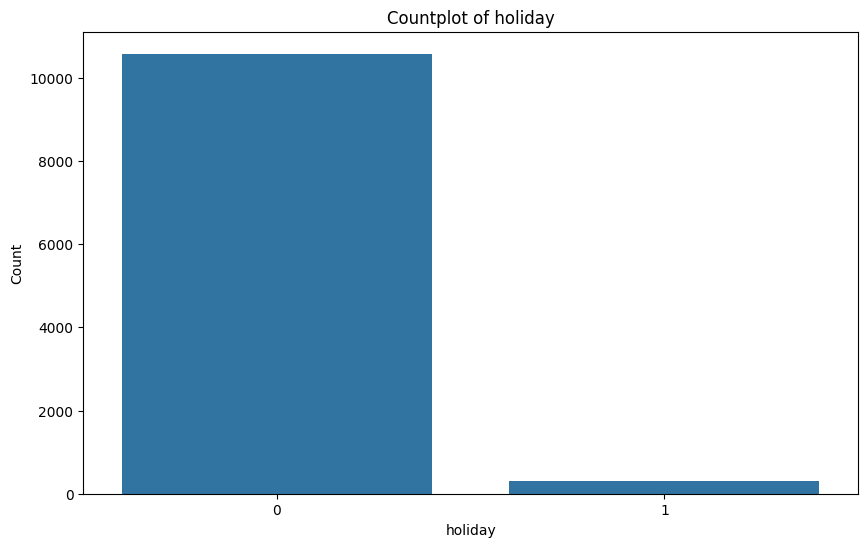

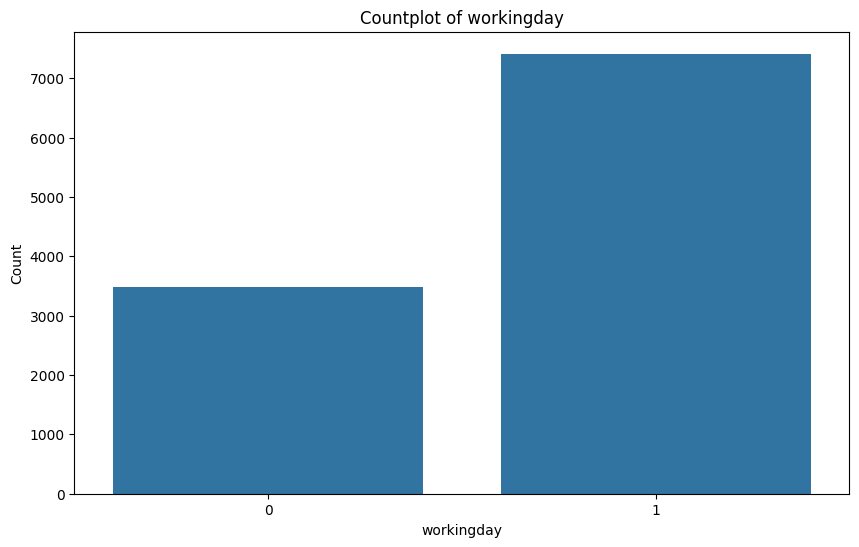

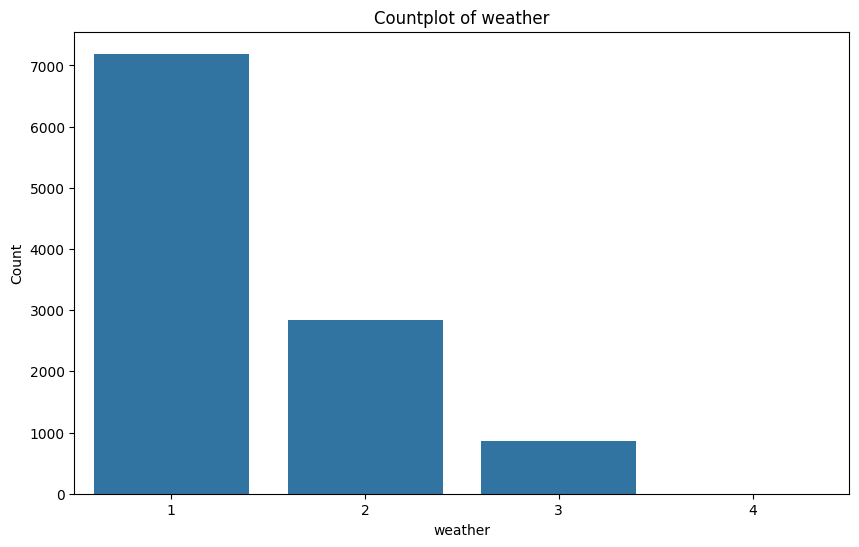

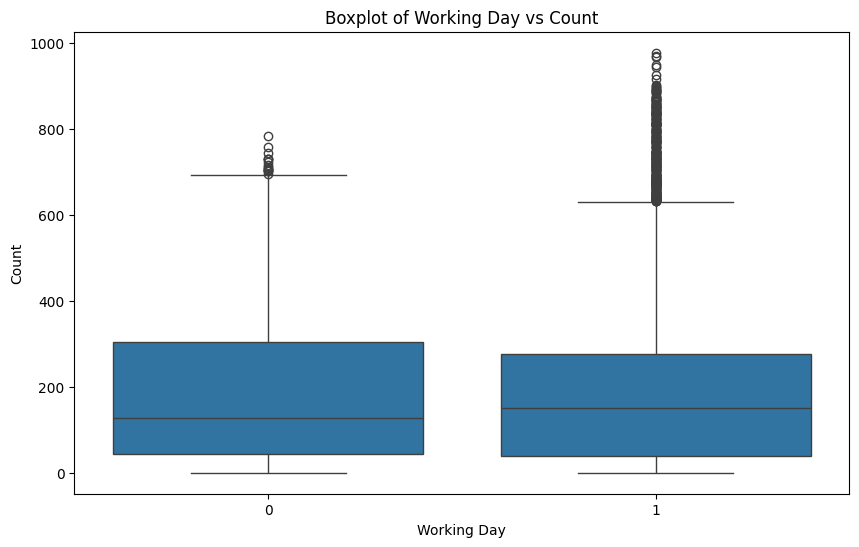

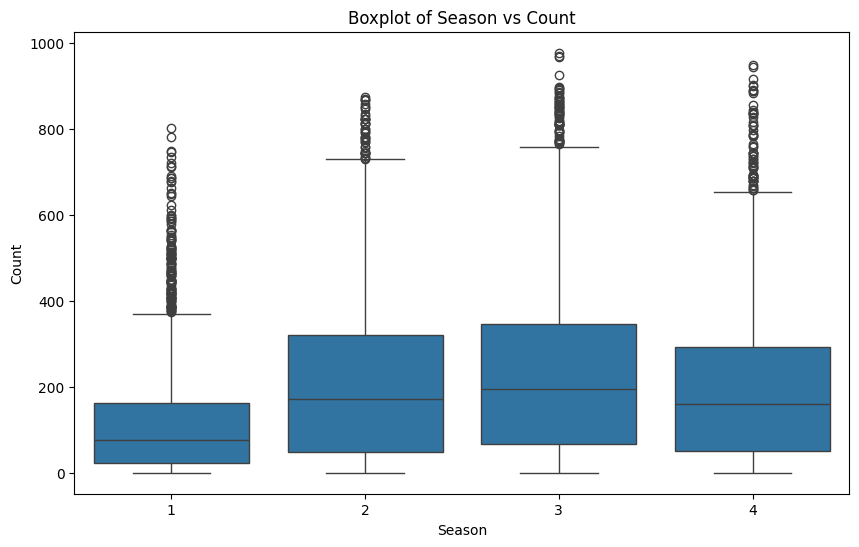

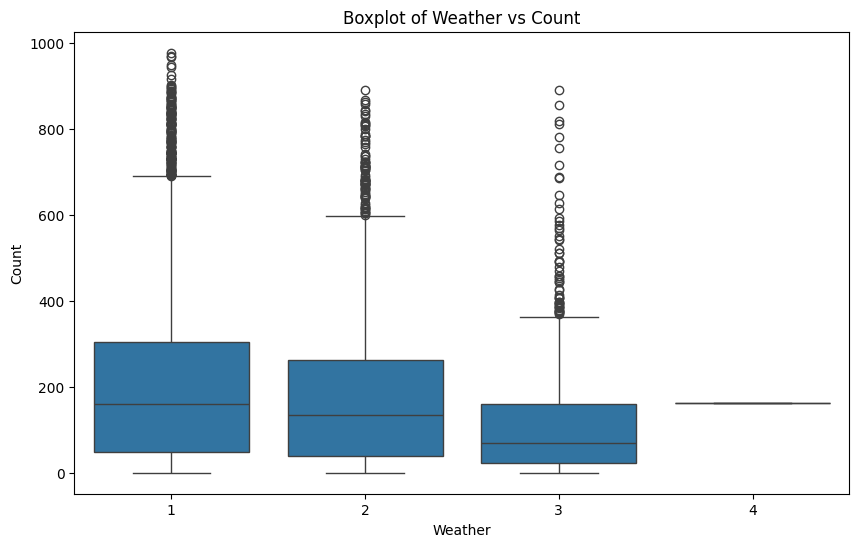

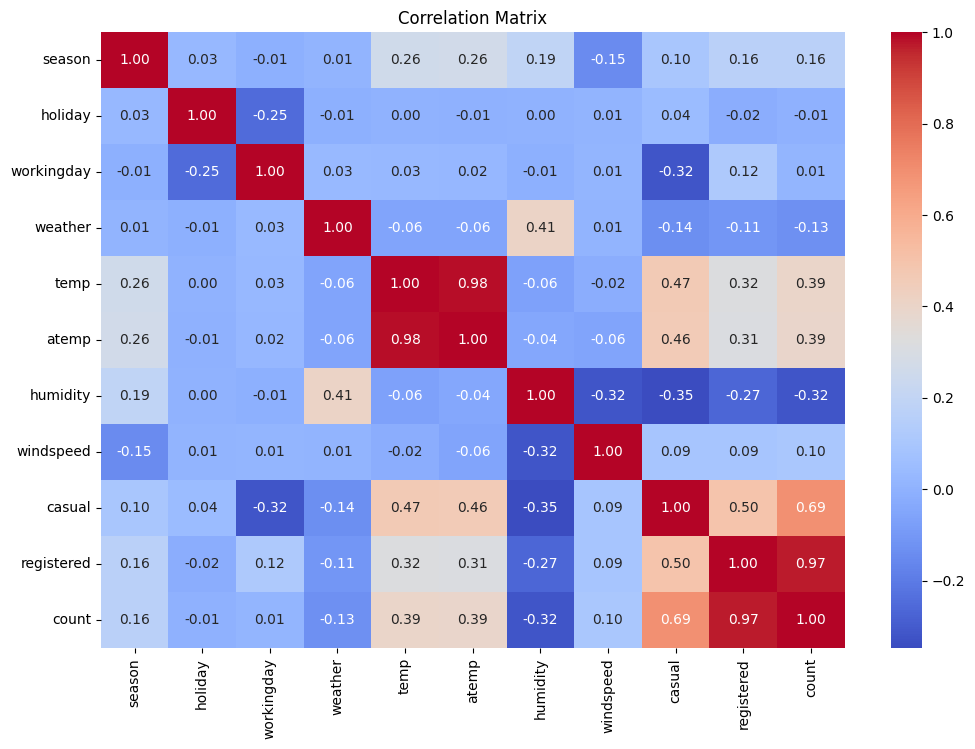

T-test results: t-statistic = 1.2096277376026694, p-value = 0.22644804226361348
ANOVA results for seasons: F-statistic = 236.94671081032106, p-value = 6.164843386499654e-149
ANOVA results for weather: F-statistic = 65.53024112793271, p-value = 5.482069475935669e-42
Chi-square test results: chi2-statistic = 49.15865559689363, p-value = 1.5499250736864862e-07


In [ ]:
# Display the first few rows of the dataset
print(yulu_data.head())

# Check for missing values
print(yulu_data.isnull().sum())

# Univariate Analysis: Distribution plots for continuous variables
continuous_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(yulu_data[var], bins=30, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# Univariate Analysis: Bar plots for categorical variables
categorical_vars = ['season', 'holiday', 'workingday', 'weather']
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=yulu_data, x=var)
    plt.title(f'Countplot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

# Bivariate Analysis: Relationship between workingday and count
plt.figure(figsize=(10, 6))
sns.boxplot(data=yulu_data, x='workingday', y='count')
plt.title('Boxplot of Working Day vs Count')
plt.xlabel('Working Day')
plt.ylabel('Count')
plt.show()

# Bivariate Analysis: Relationship between season and count
plt.figure(figsize=(10, 6))
sns.boxplot(data=yulu_data, x='season', y='count')
plt.title('Boxplot of Season vs Count')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

# Bivariate Analysis: Relationship between weather and count
plt.figure(figsize=(10, 6))
sns.boxplot(data=yulu_data, x='weather', y='count')
plt.title('Boxplot of Weather vs Count')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(yulu_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Hypothesis Testing: T-test for Working Day
workingday_data = yulu_data[yulu_data['workingday'] == 1]['count']
non_workingday_data = yulu_data[yulu_data['workingday'] == 0]['count']
t_stat, p_value = ttest_ind(workingday_data, non_workingday_data)
print(f'T-test results: t-statistic = {t_stat}, p-value = {p_value}')

# Hypothesis Testing: ANOVA for seasons
season_groups = [yulu_data[yulu_data['season'] == season]['count'] for season in yulu_data['season'].unique()]
f_stat_season, p_value_season = f_oneway(*season_groups)
print(f'ANOVA results for seasons: F-statistic = {f_stat_season}, p-value = {p_value_season}')

# Hypothesis Testing: ANOVA for weather
weather_groups = [yulu_data[yulu_data['weather'] == weather]['count'] for weather in yulu_data['weather'].unique()]
f_stat_weather, p_value_weather = f_oneway(*weather_groups)
print(f'ANOVA results for weather: F-statistic = {f_stat_weather}, p-value = {p_value_weather}')

# Hypothesis Testing: Chi-square test for weather and season
weather_season_table = pd.crosstab(yulu_data['weather'], yulu_data['season'])
chi2_stat, p_value_chi2, dof, expected = chi2_contingency(weather_season_table)
print(f'Chi-square test results: chi2-statistic = {chi2_stat}, p-value = {p_value_chi2}')

#Step 3: Conclusion and Interpretation
Working Day Effect: Since the p-value (0.2264) is greater than 0.05, we fail to reject the null hypothesis. There is no significant effect of working day on the number of electric cycles rented.
Season Effect: Since the p-value (6.1648e-149) is less than 0.05, we reject the null hypothesis. There are significant differences in the number of cycles rented across different seasons.
Weather Effect: Since the p-value (5.4821e-42) is less than 0.05, we reject the null hypothesis. There are significant differences in the number of cycles rented across different weather conditions.
Weather Dependence on Season: Since the p-value (1.5499e-07) is less than 0.05, we reject the null hypothesis. Weather is dependent on the season.